#  - My DS Portfolio -

#### Charlotte Malbouef
#### Data 1201 Final Exam
#### 2023-11-30
#### Topic: <i> Analyzing the Popularity of Today’s Artists and Music </i>

Importing the libraries:

In [61]:
import numpy as np
from datascience import *

import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline  

<hr style="border:1px solid black">

##  - Question - 
### *According to the amount of hit songs and total number of streams on Spotify, who is currently the most listened to artist?*

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For this question, I want to look at data from Spotify Top Charts, and use it to determine the most popular artists of this generation. By looking at the amount of **total streams** a singer has accumulated, and connecting this to **how many hit songs** they have made *(according to the Top Charts on Spotify)*, one can conclude how the artist is perceived amongst the general population of music listeners in terms of their likeability and popularity.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I chose this question because I as well as many others listen to Spotify on a daily basis and listening to different singers and the different kinds of art they are able to produce is fascinating. Originally, my question was geared towards finding the most popular music genre, but I realized that it was too broad of a topic because there are so many different genres that overlap and intersect. This would make it hard to group all of the data and find an accurate answer. This question also didn't focus on any specific analytics which would allow for many outliers and variables that could contradict the answer. However, once I had realized the flaws in my initial question, I was able to narrow down the variables and it eventually evolved into a more specific question that I could answer with applicable data. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Overall, my scientific goal for answering this question is so I can obtain a general understanding on what or who is deemed trendy and popular in this day and age. This data could then be used as a basis to answering many other complex questions. For example, one could use this data to analyze how the collective music taste has shifted throughout generations. Or, another example being if streams of successful songs truly align with the artist's relevance or fame of this generation. By answering more complex questions, using this data as a stepping stone, it provides material and foundation for more and more questions. Are their song's popular, but not the artists themselves? Do the most liked singers really produce the best or most creative music? Is it the public's bandwagon mentality that makes up certain singers' status? Are they good because everyone else thinks they are, or because they produce good music?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Furthermore, one could even use the data to predict future trends or patterns. What would the answer to this question look like in 20 years? What will be the new age of music? Who will still be popular? There are many questions that could use the answer to my question, in order to form predictions towards others. One could even suggest that this information could be used as a tool in finding some kind of formula or pattern that contributes to a singer's current popularity/status. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Overall, it is important to ask and answer questions as they can be used to answer even more questions. When using facts and statistics, it can be helpful to use datasets to form a consensus on patterns or trends that can ultimately be used to answer some overarching question. Whether it be a simple one, or really complex, it is important to keep asking questions as they are the gateway to more information and knowledge. 


<hr style="border:1px solid black">

##  - Getting the Data - 

### What is Needed:

In order to properly answer my question, I need to find a recent dataset of the top streamed songs on Spotify. From there, I would need to analyze this data and get (at most) the top 1000 streamed songs. This would then help me use data from the most relevant artists so I can determine how many songs they have in the top 1000 and take the combined stream total from all of their songs, and then compare them to other artists. As a result, I would Analyze the data from the top 10 Artist's to determine the answer to my question. 

### Resources:

Data Source: https://www.kaggle.com/datasets/rakkesharv/spotify-top-10000-streamed-songs by, Rakkesh Aravind G (Kaggle)

This dataset from Kaggle uses data scraped from the Spotify API to determine a song's total streams and ranks them 1 - 10,000.

### Scope:

In order to narrow the scope of data that I am analyzing, I will only use the top 1000 songs in the dataset to find the amount of top songs from one Artist, then combine the streams from all of these songs to determine total streams. Other data in this set, like peak streams, position, and days, will not be used as a factor in answering the question.  

### What are the Ethics of Narrowing Data?

When deducting an answer from a smaller, more narrow subset, rather than the whole dataset, it is important to take into consideration the ethics of using this data and the inaccuracies that could be pursued. Sometimes, there could be outliers and other factors that would play a big role on how the data is perceived. There is a chance that these factors would even change the entire perspective of the question. For example, in  my subset, if I were only to use the top 1000 songs, this would not include any popular songs an artist has created past the 1000th song. Depending on the data, there could be an artist with many more popular songs just at a lower ranking. If this data was included, it could add to their total songs and thus affect their total streams, putting them at different positions in the ranking. By using a wider range, the results could vary greatly. 

Another aspect to take into consideration is the variables that are being left out with a smaller subset. Maybe an artist has had the most songs reach the number one peak position, but their name might not even appear on the chart at all. It is good to consider how these variables or outliers could possibly change the answer to the question. There are so many factors that play into the ethical side of asking and answering these questions and it's important to be considerate of this and how it can affect your data. For this same reason, be aware of the data you receive, as biases and the scope that is used can manipulate data to reflect how one may want it to be perceived.


### Raw Data:

In [105]:
Spotify_10000 = Table.read_table("Spotify_final_dataset.csv")
Spotify_10000.show(10)

Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,(x29),2118242,883369738
2,Juice WRLD,Lucid Dreams,1673,178,1,(x20),2127668,864832399
3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,(x4),1660502,781153024
4,J. Cole,No Role Modelz,2547,6,7,0,659366,734857487
5,Post Malone,rockstar,1223,186,1,(x124),2905678,718865961
6,Travis Scott,goosebumps,1995,4,8,0,977275,672972704
7,The Weeknd,Blinding Lights,1100,233,1,(x11),2355059,644287953
8,XXXTENTACION,Jocelyn Flores,1673,44,2,(x1),3175206,624457164
9,XXXTENTACION,SAD!,1217,133,1,(x6),4437612,619879245
10,Juice WRLD,All Girls Are The Same,1681,2,5,0,1239152,613872384


### Data Wrangling:

In [107]:
Spotify_Top_1000 = Spotify_10000.take(np.arange(1000)).drop("Position", "Days", "Top 10 (xTimes)", "Peak Position (xTimes)" , "Peak Streams", "Peak Position")
Spotify_Top_1000.show(15)

Artist Name,Song Name,Total Streams
Post Malone,Sunflower SpiderMan: Into the SpiderVerse,883369738
Juice WRLD,Lucid Dreams,864832399
Lil Uzi Vert,XO TOUR Llif3,781153024
J. Cole,No Role Modelz,734857487
Post Malone,rockstar,718865961
Travis Scott,goosebumps,672972704
The Weeknd,Blinding Lights,644287953
XXXTENTACION,Jocelyn Flores,624457164
XXXTENTACION,SAD!,619879245
Juice WRLD,All Girls Are The Same,613872384


### Column Information:

**Artist Name** - The name of the Artist that sang/created the song

**Song Name** - The name of the song

**Total Streams** - The total amount of streams the song has received

### Removed:

~**Position** - What rank the Song is based off stream total~

~**Days** - The amount of days since the song has been released/made~

~**Top 10 (x Times)** - The amount of days/time the song has been in the top 10 charts~

~**Peak Position** - The highest position reached in the top 10 (1 being the highest)~

~**Peak Position (x Times)** - How many times the song has reached its peak position~

~**Peak Streams** - How many streams the song received when in peak position~ 

To tidy the data, I removed the columns that were not necessary for drawing a conclusion for my data and didn't focus on the scope. I also narrowed the dataset down to 1,000 songs. I only need the above columns and some addiontal math functions to achieve the data for my answer. Further, I will separate the table into two additional categories, one that finds the number of top hits, and one that finds the total streams.

In [106]:
#Takes top 10 Artists and compares the amount of songs they have in the top 1000
Top_Artist_Song_Amount = Spotify_Top_1000.group('Artist Name').select('Artist Name', 'count').sort('count', descending = True).relabeled('count', 'Number of Top Hits').take(np.arange(10))
Top_Artist_Song_Amount.show()

Artist Name,Number of Top Hits
Drake,41
Post Malone,25
Taylor Swift,21
The Weeknd,21
Ariana Grande,18
Bad Bunny,18
Juice WRLD,16
Billie Eilish,14
Lil Uzi Vert,14
XXXTENTACION,13


This table uses the amount of songs and asigns them to the creator and finds the amount of popular songs that they have made.

In [112]:
# Takes top 10 Artists and compares the amount of songs they have in the top 1000
Artist_Stream_Amount = Spotify_Top_1000.group('Artist Name', np.sum).select('Artist Name', 'Total Streams sum').sort('Total Streams sum', descending = True).relabeled('Total Streams sum', 'Total Streams').with_column(
'Rank', np.array(np.arange(1,375))
).take(np.arange(10))
Artist_Stream_Amount.show()

Artist Name,Total Streams,Rank
Drake,6788989235,1
Post Malone,6648004900,2
Juice WRLD,3979114900,3
The Weeknd,3500035373,4
XXXTENTACION,3374637732,5
Billie Eilish,2587306253,6
Ariana Grande,2418370480,7
Travis Scott,2350898402,8
Lil Uzi Vert,2350415250,9
Bad Bunny,2053729459,10


 This table takes the sum of the streams from all of their songs and produces the total streams each artist has.

## - Exploring the Data -

### Possible Questions?

#### Taylor Swift had many hit songs. Why does she not have a high amount of total streams?
* Taylor Swift is an outlier in this data because she has the 3rd highest number of hit songs, but does not even appear on the highest total streams table. This could be because Taylor Swift's songs, though she has many, are all ranked lower in the top 1000. This would bring down her total stream count because other artist's have had more popular hit songs, therefore gathering more streams.
    
#### Why is Post Malone's total stream count almost as high as Drake's even though he has significantly less popular songs?

* Post Malone is a similar outlier in this case, but, even though he has half the amount of hit songs that Drake has, he has such a high amount of streams. This is because a couple of his songs were ranked high on the most streamed songs list. For example, *SunFlower by: Post Malone* being the most streamed song overall. Due to this, his total stream count will be much higher. 

#### Why does the removed data not affect the results?

* While this data could affect my answer if I were focusing on a different aspect, due to my scope narrowing on the total amount of streams, certain data like days, peak streams, and peak positions do not matter for my calculations/analyzation. Since they are temporary values, they wil not affect the total value of the data that applies to my scope. 

### Observations:

* **Using the newly wrangled data, I am able to observe how both tables correlate with one another**


  1. Between both tables of data, *8/10* of the top artists remain the same and consistent with their placement
  2. Further, *half* of these top artists are in the exact same place/ranking
  3. The remaing artists only moving *1-2* placements up or down 
* **This allows one to gather that there is a valid correlation between the amount of hit songs and total streams**
    1. The *higher the amount of hit songs*, the more likely the artist will have a *higher amount of total streams*
    2. This connection provides a basis for answering the main question

## - Results & Data Visualization -

### Bar Chart that Ranks Artists Based Off of Total Number of Top Hits they Have:

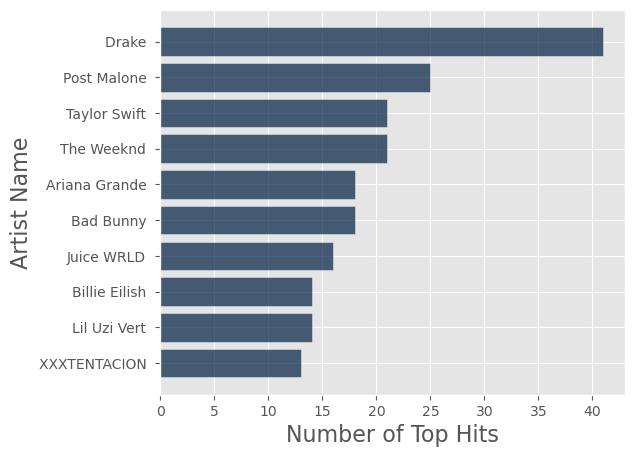

In [108]:
Top_Artist_Song_Amount.barh('Artist Name','Number of Top Hits')

The diagram above is a horizontal bar graph displaying the total number of top hits each artist has in the dataset. On the Y axis are the names of the top 10 artists in order from most songs to least songs. On the X axis, there are bins split into 5's starting from 0-40. This number represents the total number of top hits/songs.

As described above, this bar graph shows Drake having the highest number of top hits out of the 1000 most streamed songs on Spotify by a large margin. The rest of the singers on average have about 15 popular songs.

### Bar Chart that Ranks Artists Based Off of Total Amount of Streams they Have:

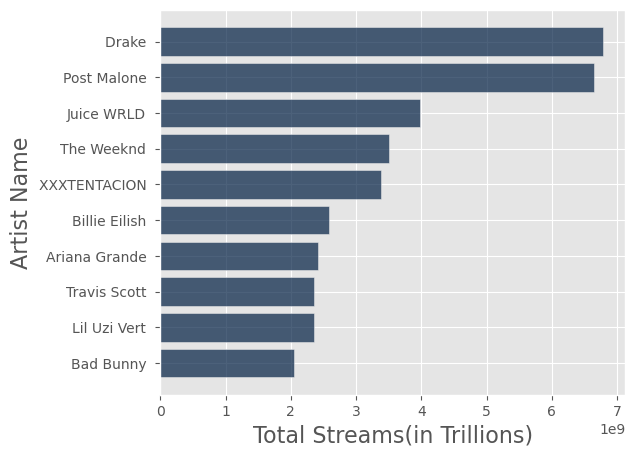

In [113]:
Artist_Stream_Amount = Spotify_Top_1000.group('Artist Name', np.sum).select('Artist Name', 'Total Streams sum').sort('Total Streams sum', descending = True).relabeled('Total Streams sum', 'Total Streams(in Trillions)').with_column(
'Rank', np.array(np.arange(1,375))
).take(np.arange(10))
Artist_Stream_Amount.barh('Artist Name','Total Streams(in Trillions)')

The second visual is also a horizontal bar graph. This one represents the total amount of streams an artist has accumulated with all of their top songs. On the Y-axis, we have the top 10 artists with the most streams, and they are descending from most to least. On the X-axis, we have values of 0-7 that are represented in trillions. This is for the total streams each artist has. 

This chart shows Drake also has the highest total number of streams with almost 7 trillion streams, followed by Post Malone. The rest of the 8 singers have a total amount of streams between 2 trillion and 4 trillion. This is a significant margin again between the top singer and the rest of the top 10 artists.  

### Analysis: 

**Conclusion:** Out of the top 10 artists, Drake shows the highest numbers by a large margin from everyone else. As stated in the observations above, the ranking of each artist remains relatively consistent between both graphs. Thus, providing a basis and logical data to make an evaluation. Using this information, and the visuals provided, it appears that Drake is considered the most listened to artist on Spotify. This answer is evident by his number one ranking on both the number of hit songs graph and the total streams graph. He had more hit songs in the top 1000 most streamed songs dataset, and  therefore was able to accumulate a large amount of streams from all of his popular songs. With this data proving his "popularity" and likeability amongst music listeners, one could gather that his music genre, creation, and style are enjoyed by a large majority, contributing to his status as the most listened to artist on spotify

**NOTE:** This data should be taken with a grain of salt because it is from an older dataset which screws these results by a couple of years. However, this is expected with data as it hard to get the most recent data, when typically it is still being collected, and those statistics/results take time to gather. 

**What's Next?** As touched on in the beginning when addressing the question, analyzing this data not only helps with the task at hand, but also opens a door of opportunity for many more questions and ideas. One could use this to develop a pattern to see the change in results over a time period. Then analyze how music taste in general has shifted over generations etc. There are so many possibilities and answering questions is just a gateway to more and more questions and answers. The world seems to be filled with endless knowledge, and questions are the core of obtaining this information.
